<a href="https://colab.research.google.com/github/infinite-darkness108/SpeechSeverityClassifier/blob/main/SHIMMER_JITTER_BASED_CLASSIFICATION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

import pandas
from keras.models import Sequential,model_from_json
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from keras.utils import np_utils

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline

import matplotlib.pyplot as plt
import numpy
from sklearn import metrics

Mounted at /content/drive


In [ ]:
dataframe=pandas.read_excel('/content/Data_Stutter.xlsx')
dataframe

,voiceID,duration,meanF0Hz,stdevF0Hz,HNR,localJitter,localShimmer,classification
0,/content/gdrive/MyDrive/TDSC/akshay/data/MAK11...,1.342500,237.676029,12.434711,17.823073,0.010778,0.112667,mild
1,/content/gdrive/MyDrive/TDSC/akshay/data/MAK28...,3.692687,232.306400,15.120705,15.621474,0.006400,0.073167,mild
2,/content/gdrive/MyDrive/TDSC/akshay/data/MAK30...,3.923563,231.586592,35.033114,14.609275,0.008013,0.069346,mild
3,/content/gdrive/MyDrive/TDSC/akshay/data/MAK12...,0.881625,219.410872,11.323056,17.716161,0.014021,0.066084,mild
4,/content/gdrive/MyDrive/TDSC/akshay/data/MAK14...,0.997625,225.065675,9.296925,18.677438,0.014705,0.061086,mild
...,...,...,...,...,...,...,...,...
6220,/content/drive/MyDrive/TDSC/moderate/ambika/FA...,2.688813,199.366598,54.951059,21.373374,0.009722,0.050681,moderate
6221,/content/drive/MyDrive/TDSC/moderate/ambika/FA...,2.145938,222.136320,66.778666,24.632237,0.006219,0.041101,moderate
6222,/content/drive/MyDrive/TDSC/moderate/ambika/FA...,2.867500,189.535449,58.221250,24.828079,0.008926,0.063490,moderate
6223,/content/drive/MyDrive/TDSC/moderate/ambika/FA...,1.000938,209.588239,65.645378,19.670455,0.012413,0.072662,moderate


In [ ]:
dataset=dataframe.values
# count of each class
mild=0
moderate=0
severe=0
for i in range(len(dataset)):
    if dataset [i][7]=='mild': mild=mild+1
    elif dataset[i][7]=='moderate': moderate=moderate+1
    else: severe= severe+1

print(mild)
print(moderate)
print(severe)

1825
3306
1094


In [ ]:
count=4001
for i in range(len(dataset)):
  if dataset[i][7]=='mild' and count<4001:
     dataframe.loc[len(dataframe.index)] = dataset[i]
     count+=1
print(count)

count=4001
for i in range(len(dataset)):
  if dataset[i][7]=='moderate' and count<4001:
     dataframe.loc[len(dataframe.index)] = dataset[i]
     count+=1
print(count)

count=3282
for i in range(len(dataset)):
  if dataset[i][7]=='severe' and count<4001:
     dataframe.loc[len(dataframe.index)] = dataset[i]
     count+=1
print(count)

# ran this code some 3 times to make training data equal for all classes

4001
4001
4001


In [ ]:
dataset=dataframe.values

X=dataset[:,1:7].astype(float)
Y=dataset[:,7]

encoder=LabelEncoder()
encoder.fit(Y)
encoded_Y=encoder.transform(Y)
dummy_Y=np_utils.to_categorical(encoded_Y)

Loaded model from disk
accuracy: 65.79%
 
 
376/376 [==============================] - 1s 1ms/step


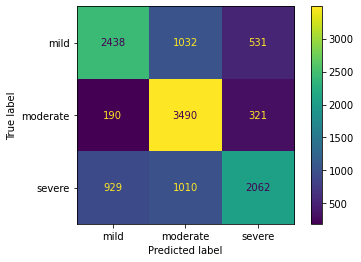

In [ ]:
#model when trained with unequal data

json_file = open("/content/drive/MyDrive/Quality_data/model.json", 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
# load weights into new model
loaded_model.load_weights("/content/drive/MyDrive/Quality_data/model.h5")
print("Loaded model from disk")

# evaluate loaded model on test data
loaded_model.compile(loss='categorical_crossentropy',optimizer='adam', metrics=['accuracy'])

score = loaded_model.evaluate(X,dummy_Y,verbose=0)
print("%s: %.2f%%" % (loaded_model.metrics_names[1], score[1]*100))

print(" ")
print(" ")

ynew = loaded_model.predict(X)

for i in range(len(ynew)):
   for j in range(2):
       ynew[i][j]=round(ynew[i][j])

Y_predicted=[]
for i in range(len(ynew)):
   if ynew[i][0]==1:
       Y_predicted.append('mild')
   elif ynew[i][1]==1:
       Y_predicted.append('moderate')
   else:
       Y_predicted.append('severe')

Actual=[]
for i in range(len(dummy_Y)):
   if dummy_Y[i][0]==1:
       Actual.append('mild')
   elif dummy_Y[i][1]==1:
       Actual.append('moderate')
   else:
       Actual.append('severe')

confusion_matrix = metrics.confusion_matrix(Actual,Y_predicted)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = ['mild','moderate','severe'])

cm_display.plot()
plt.show()

In [ ]:
model=Sequential()
model.add(Dense(8,input_dim=6,activation='relu'))
model.add(Dense(26,activation='relu'))
model.add(Dense(26,activation='relu'))
model.add(Dense(3,activation='softmax'))
model.compile(loss='categorical_crossentropy',optimizer='adam', metrics=['accuracy'])
model.fit(X, dummy_Y, epochs=1000, batch_size=5, verbose=0)

model_json = model.to_json()
with open("/content/drive/MyDrive/Quality_data/model_eq.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("/content/drive/MyDrive/Quality_data/model_eq.h5")
print("Saved model to disk")

Saved model to disk


In [ ]:
#model when trained with unequal data

json_file = open("/content/drive/MyDrive/Quality_data/model_eq.json", 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
# load weights into new model
loaded_model.load_weights("/content/drive/MyDrive/Quality_data/model_eq.h5")
print("Loaded model from disk")

# evaluate loaded model on test data
loaded_model.compile(loss='categorical_crossentropy',optimizer='adam', metrics=['accuracy'])

score = loaded_model.evaluate(X,dummy_Y,verbose=0)
print("%s: %.2f%%" % (loaded_model.metrics_names[1], score[1]*100))

print(" ")
print(" ")

ynew = loaded_model.predict(X)

Loaded model from disk
accuracy: 75.41%
 
 
376/376 [==============================] - 1s 1ms/step


Loaded model from disk
accuracy: 75.41%
 
 
376/376 [==============================] - 1s 1ms/step


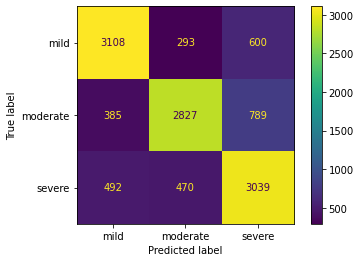

In [ ]:

for i in range(len(ynew)):
   for j in range(2):
       ynew[i][j]=round(ynew[i][j])

Y_predicted=[]
for i in range(len(ynew)):
   if ynew[i][0]==1:
       Y_predicted.append('mild')
   elif ynew[i][1]==1:
       Y_predicted.append('moderate')
   else:
       Y_predicted.append('severe')

Actual=[]
for i in range(len(dummy_Y)):
   if dummy_Y[i][0]==1:
       Actual.append('mild')
   elif dummy_Y[i][1]==1:
       Actual.append('moderate')
   else:
       Actual.append('severe')

confusion_matrix = metrics.confusion_matrix(Actual,Y_predicted)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = ['mild','moderate','severe'])

cm_display.plot()
plt.show()

Loaded model from drive
376/376 [==============================] - 1s 1ms/step
Loaded model from drive
376/376 [==============================] - 1s 1ms/step
Loaded model from drive
376/376 [==============================] - 1s 1ms/step


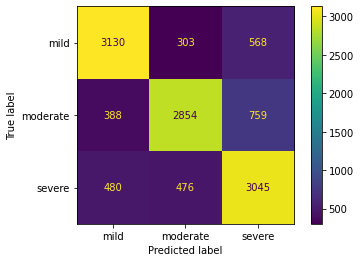

In [ ]:
json_file = open("/content/drive/MyDrive/Quality_data/model_mild_moderate.json", 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
loaded_model.load_weights("/content/drive/MyDrive/Quality_data/model_mild_moderate.h5")
print("Loaded model from drive")
loaded_model.compile(loss='categorical_crossentropy',optimizer='adam', metrics=['accuracy'])
y1new=loaded_model.predict(X)

json_file = open("/content/drive/MyDrive/Quality_data/model_moderate_severe.json", 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
loaded_model.load_weights("/content/drive/MyDrive/Quality_data/model_moderate_severe.h5")
print("Loaded model from drive")
loaded_model.compile(loss='categorical_crossentropy',optimizer='adam', metrics=['accuracy'])
y2new=loaded_model.predict(X)

json_file = open("/content/drive/MyDrive/Quality_data/model_mild_severe.json", 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
loaded_model.load_weights("/content/drive/MyDrive/Quality_data/model_mild_severe.h5")
print("Loaded model from drive")
loaded_model.compile(loss='categorical_crossentropy',optimizer='adam', metrics=['accuracy'])
y3new=loaded_model.predict(X)


for i in range(len(ynew)):

  if ynew[i][0]>0.45 and ynew[i][1]>0.45:
    if y1new[i][0]>y1new[i][1]:
      ynew[i][0]=1
      ynew[i][1]=0
    else:
      ynew[i][0]=0
      ynew[i][1]=1

  if ynew[i][1]>0.45 and ynew[i][2]>0.45:
    if y2new[i][0]>y2new[i][1]:
      ynew[i][1]=1
      ynew[i][2]=0
    else:
      ynew[i][1]=0
      ynew[i][2]=1      

  if ynew[i][0]>0.45 and ynew[i][2]>0.45:
    if y3new[i][0]>y3new[i][1]:
      ynew[i][0]=1
      ynew[i][2]=0
    else:
      ynew[i][0]=0
      ynew[i][2]=1      

for i in range(len(ynew)):
   for j in range(2):
       ynew[i][j]=round(ynew[i][j])

Y_predicted=[]
for i in range(len(ynew)):
   if ynew[i][0]==1:
       Y_predicted.append('mild')
   elif ynew[i][1]==1:
       Y_predicted.append('moderate')
   else:
       Y_predicted.append('severe')

Actual=[]
for i in range(len(dummy_Y)):
   if dummy_Y[i][0]==1:
       Actual.append('mild')
   elif dummy_Y[i][1]==1:
       Actual.append('moderate')
   else:
       Actual.append('severe')

confusion_matrix = metrics.confusion_matrix(Actual,Y_predicted)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = ['mild','moderate','severe'])

cm_display.plot()
plt.show()

In [ ]:

dataframe = dataframe.drop(6225)
dataframe

,voiceID,duration,meanF0Hz,stdevF0Hz,HNR,localJitter,localShimmer,classification
0,/content/gdrive/MyDrive/TDSC/akshay/data/MAK11...,1.342500,237.676029,12.434711,17.823073,0.010778,0.112667,mild
1,/content/gdrive/MyDrive/TDSC/akshay/data/MAK28...,3.692687,232.306400,15.120705,15.621474,0.006400,0.073167,mild
2,/content/gdrive/MyDrive/TDSC/akshay/data/MAK30...,3.923563,231.586592,35.033114,14.609275,0.008013,0.069346,mild
3,/content/gdrive/MyDrive/TDSC/akshay/data/MAK12...,0.881625,219.410872,11.323056,17.716161,0.014021,0.066084,mild
4,/content/gdrive/MyDrive/TDSC/akshay/data/MAK14...,0.997625,225.065675,9.296925,18.677438,0.014705,0.061086,mild
...,...,...,...,...,...,...,...,...
6220,/content/drive/MyDrive/TDSC/moderate/ambika/FA...,2.688813,199.366598,54.951059,21.373374,0.009722,0.050681,moderate
6221,/content/drive/MyDrive/TDSC/moderate/ambika/FA...,2.145938,222.136320,66.778666,24.632237,0.006219,0.041101,moderate
6222,/content/drive/MyDrive/TDSC/moderate/ambika/FA...,2.867500,189.535449,58.221250,24.828079,0.008926,0.063490,moderate
6223,/content/drive/MyDrive/TDSC/moderate/ambika/FA...,1.000938,209.588239,65.645378,19.670455,0.012413,0.072662,moderate


In [ ]:
def baseline_model():
   model=Sequential()
   model.add(Dense(16,input_dim=6,activation='relu'))
   model.add(Dense(200,activation='relu'))
   model.add(Dense(200,activation='relu'))
   model.add(Dense(64,activation='relu'))
   model.add(Dense(3,activation='softmax'))
   model.compile(loss='categorical_crossentropy',optimizer='adam', metrics=['accuracy'])
   return model

In [ ]:
estimator = KerasClassifier(build_fn=baseline_model, epochs=2000, batch_size=5, verbose=0)
kfold = KFold(n_splits=10,shuffle=True)
results = cross_val_score(estimator, X, dummy_Y, cv=kfold)
print("Baseline: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

In [ ]:
###### DATA ERROR MODEL EXPECTED 4 CLASSES INCLUDING 'NAN' FOR THERE WAS AN EMPTY ROW INBETWEEN THE DATAS OF CSV ######

#32% accuracy for epochs=200, batch_size=5, verbose=0
#model.add(Dense(8,input_dim=6,activation='relu'))
#model.add(Dense(4,activation='softmax'))
#model.compile(loss='categorical_crossentropy',optimizer='adam', metrics=['accuracy'])

In [ ]:
###### DATA ERROR MODEL EXPECTED 4 CLASSES INCLUDING 'NAN' FOR THERE WAS AN EMPTY ROW INBETWEEN THE DATAS OF CSV ######

#32% accuracy for epochs=200, batch_size=5, verbose=0
#model.add(Dense(8,input_dim=6,activation='relu'))
#model.add(Dense(6,activation='relu'))
#model.add(Dense(4,activation='softmax'))
#model.compile(loss='categorical_crossentropy',optimizer='adam', metrics=['accuracy'])

In [ ]:
###### DATA ERROR MODEL EXPECTED 4 CLASSES INCLUDING 'NAN' FOR THERE WAS AN EMPTY ROW INBETWEEN THE DATAS OF CSV ######

#32% accuracy for epochs=200, batch_size=5, verbose=0
#model.add(Dense(8,input_dim=6,activation='relu'))
#model.add(Dense(50,activation='relu'))
#model.add(Dense(4,activation='softmax'))
#model.compile(loss='categorical_crossentropy',optimizer='adam', metrics=['accuracy'])

In [ ]:
###### FULL TRAINING DATA EMPLOYED ########

#74% accuracy for mild vs severe only/-
#for epochs=200, batch_size=5, verbose=0
#model.add(Dense(8,input_dim=6,activation='relu'))
#model.add(Dense(20,activation='relu'))
#model.add(Dense(2,activation='softmax'))
#model.compile(loss='categorical_crossentropy',optimizer='adam', metrics=['accuracy'])

In [ ]:
###### FULL TRAINING DATA EMPLOYED ########

#52% accuracy for epochs=200, batch_size=5, verbose=0
#model.add(Dense(8,input_dim=6,activation='relu'))
#model.add(Dense(3,activation='softmax'))
#model.compile(loss='categorical_crossentropy',optimizer='adam', metrics=['accuracy'])

In [ ]:
###### FULL TRAINING DATA EMPLOYED AND ########

#53% accuracy for epochs=200, batch_size=5, verbose=0
#model.add(Dense(8,input_dim=6,activation='tanh'))
#model.add(Dense(20, activation='tanh'))
#model.add(Dense(3,activation='softmax'))
#model.compile(loss='categorical_crossentropy',optimizer='adam', metrics=['accuracy'])

In [ ]:
###### FULL TRAINING DATA EMPLOYED ########

#51% accuracy for epochs=10, batch_size=5, verbose=0
#model.add(Dense(8,input_dim=6,activation='tanh'))
#model.add(Dense(20, activation='tanh'))
#model.add(Dense(3,activation='softmax'))
#model.compile(loss='categorical_crossentropy',optimizer='adam', metrics=['accuracy'])

In [ ]:
###### FULL TRAINING DATA EMPLOYED ########

#55% accuracy for epochs=10, batch_size=2, verbose=0
#model.add(Dense(8,input_dim=6,activation='tanh'))
#model.add(Dense(20, activation='tanh'))
#model.add(Dense(3,activation='softmax'))
#model.compile(loss='categorical_crossentropy',optimizer='adam', metrics=['accuracy'])

In [ ]:
###### FULL TRAINING DATA EMPLOYED ########

#65% accuracy for epochs=200, batch_size=5, verbose=0
#model.add(Dense(8,input_dim=6,activation='relu'))
#model.add(Dense(30, activation='relu'))
#model.add(Dense(3,activation='softmax'))
#model.compile(loss='categorical_crossentropy',optimizer='adam', metrics=['accuracy'])

In [ ]:
###### FULL TRAINING DATA EMPLOYED ########

#66% accuracy for epochs=200, batch_size=5, verbose=0
#model.add(Dense(8,input_dim=6,activation='relu'))
#model.add(Dense(20, activation='relu'))
#model.add(Dense(3,activation='softmax'))
#model.compile(loss='categorical_crossentropy',optimizer='adam', metrics=['accuracy'])

In [ ]:
###### FULL TRAINING DATA EMPLOYED ########

#66% accuracy for epochs=100, batch_size=2, verbose=0
#model.add(Dense(8,input_dim=6,activation='relu'))
#model.add(Dense(20,activation='relu'))
#model.add(Dense(20,activation='relu'))
#model.add(Dense(3,activation='softmax'))
#model.compile(loss='categorical_crossentropy',optimizer

In [ ]:
###### FULL TRAINING DATA EMPLOYED ########

# 67% accuracy for epochs=300, batch_size=5, verbose=0
#model.add(Dense(16,input_dim=6,activation='relu'))
#model.add(Dense(100,activation='relu'))
#model.add(Dense(16,activation='relu'))
#model.add(Dense(3,activation='softmax'))

In [ ]:
###### FULL TRAINING DATA EMPLOYED ########

#68% accuracy for epochs=200, batch_size=5, verbose=0
#model.add(Dense(8,input_dim=6,activation='relu'))
#model.add(Dense(20,activation='relu'))
#model.add(Dense(20,activation='relu'))
#model.add(Dense(3,activation='softmax'))
#model.compile(loss='categorical_crossentropy',optimizer

In [ ]:
###### FULL TRAINING DATA EMPLOYED ########

#69% accuracy for epochs=300, batch_size=5, verbose=0
#model.add(Dense(16,input_dim=6,activation='relu'))
#model.add(Dense(16,activation='relu'))
#model.add(Dense(16,activation='relu'))
#model.add(Dense(3,activation='softmax'))
#model.compile(loss='categorical_crossentropy',optimizer

In [ ]:
###### FULL TRAINING DATA EMPLOYED ########

#69% accuracy for epochs=300, batch_size=5, verbose=0
#model.add(Dense(8,input_dim=6,activation='relu'))
#model.add(Dense(20,activation='relu'))
#model.add(Dense(20,activation='relu'))
#model.add(Dense(3,activation='softmax'))
#model.compile(loss='categorical_crossentropy',optimizer

In [ ]:
###### FULL TRAINING DATA EMPLOYED ########

#70% accuracy for epochs=300, batch_size=5, verbose=0
#model.add(Dense(8,input_dim=6,activation='relu'))
#model.add(Dense(40,activation='relu'))
#model.add(Dense(40,activation='relu'))
#model.add(Dense(3,activation='softmax'))
#model.compile(loss='categorical_crossentropy',optimizer

In [ ]:
###### FULL TRAINING DATA EMPLOYED ########

#70% accuracy for epochs=300, batch_size=5, verbose=0
#model.add(Dense(8,input_dim=6,activation='relu'))
#model.add(Dense(16,activation='relu'))
#model.add(Dense(16,activation='relu'))
#model.add(Dense(3,activation='softmax'))
#model.compile(loss='categorical_crossentropy',optimizer

In [ ]:
###### FULL TRAINING DATA EMPLOYED ########

#70% accuracy for epochs=300, batch_size=5, verbose=0
#model.add(Dense(8,input_dim=6,activation='relu'))
#model.add(Dense(16,activation='relu'))
#model.add(Dense(26,activation='relu'))
#model.add(Dense(3,activation='softmax'))
#model.compile(loss='categorical_crossentropy',optimizer

In [ ]:
###### FULL TRAINING DATA EMPLOYED ########

#70% accuracy for epochs=300, batch_size=5, verbose=0
#model.add(Dense(8,input_dim=6,activation='relu'))
#model.add(Dense(26,activation='relu'))
#model.add(Dense(26,activation='relu'))
#model.add(Dense(3,activation='softmax'))
#model.compile(loss='categorical_crossentropy',optimizer

In [ ]:
###### FULL TRAINING DATA EMPLOYED ########

#70% accuracy for epochs=300, batch_size=5, verbose=0
#model.add(Dense(8,input_dim=6,activation='relu'))
#model.add(Dense(16,activation='relu'))
#model.add(Dense(16,activation='relu'))
#model.add(Dense(16, activation='relu'))
#model.add(Dense(3,activation='softmax'))
#model.compile(loss='categorical_crossentropy',optimizer

In [ ]:
###### FULL TRAINING DATA EMPLOYED ########

#70% accuracy for epochs=300, batch_size=5, verbose=0
#model.add(Dense(16,input_dim=6,activation='relu'))
#model.add(Dense(100,activation='relu'))
#model.add(Dense(100,activation='relu'))
#model.add(Dense(64, activation='relu'))
#model.add(Dense(3,activation='softmax'))
#model.compile(loss='categorical_crossentropy',optimizer

In [ ]:
###### FULL TRAINING DATA EMPLOYED ########

# 71% accuracy for epochs=300, batch_size=5, verbose=0
#model.add(Dense(16,input_dim=6,activation='relu'))
#model.add(Dense(100,activation='relu'))
#model.add(Dense(100,activation='relu'))
#model.add(Dense(3,activation='softmax'))

In [ ]:
###### FULL TRAINING DATA EMPLOYED ########

# 71% accuracy for epochs=200, batch_size=5, verbose=0
#model.add(Dense(16,input_dim=6,activation='relu'))
#model.add(Dense(200,activation='relu'))
#model.add(Dense(200,activation='relu'))
#model.add(Dense(64,activation='relu'))
#model.add(Dense(3,activation='softmax'))

In [ ]:
###### FULL TRAINING DATA EMPLOYED ########

# 72% accuracy for epochs=1000, batch_size=5, verbose=0
#model.add(Dense(8,input_dim=6,activation='relu'))
#model.add(Dense(26,activation='relu'))
#model.add(Dense(26,activation='relu'))
#model.add(Dense(3,activation='softmax'))
#model.compile(loss='categorical_crossentropy',optimizer

In [ ]:
###### FULL TRAINING DATA EMPLOYED for mild vs severe ########

# 77% accuracy for epochs=200, batch_size=5, verbose=0
#model.add(Dense(16,input_dim=6,activation='relu'))
#model.add(Dense(100,activation='relu'))
#model.add(Dense(100,activation='relu'))
#model.add(Dense(64,activation='relu'))
#model.add(Dense(2,activation='softmax'))
#model.compile(loss='categorical_crossentropy',optimizer

In [ ]:
###### FULL TRAINING DATA EMPLOYED for mild vs severe ########

# 77% accuracy for epochs=400, batch_size=5, verbose=0
#model.add(Dense(16,input_dim=6,activation='relu'))
#model.add(Dense(100,activation='relu'))
#model.add(Dense(100,activation='relu'))
#model.add(Dense(64,activation='relu'))
#model.add(Dense(2,activation='softmax'))
#model.compile(loss='categorical_crossentropy',optimizer

In [ ]:
# for mild vs severe
# 77% accuracy for epochs=400, batch_size=5, verbose=0
#model.add(Dense(16,input_dim=6,activation='relu'))
#model.add(Dense(200,activation='relu'))
#model.add(Dense(200,activation='relu'))
#model.add(Dense(64,activation='relu'))
#model.add(Dense(2,activation='softmax'))

In [ ]:
###### FULL TRAINING DATA EMPLOYED for mild vs severe ########

# 78% accuracy for epochs=300, batch_size=5, verbose=0
#model.add(Dense(16,input_dim=6,activation='relu'))
#model.add(Dense(100,activation='relu'))
#model.add(Dense(100,activation='relu'))
#model.add(Dense(64,activation='relu'))
#model.add(Dense(2,activation='softmax'))
#model.compile(loss='categorical_crossentropy',optimizer

In [ ]:
#!pip install praat-parselmouth

In [ ]:
import parselmouth
sound = parselmouth.Sound(audio_path)
pitch = call(sound, "To Pitch", 0.0, 75, 600)
harmonicity = call(sound, "To Harmonicity (cc)", 0.01, 75, 0.1, 1.0)
hnr = call(harmonicity, "Get mean", 0, 0)
pointProcess = call(sound, "To PointProcess (periodic, cc)", 75, 500)
localJitter = call(pointProcess, "Get jitter (local)", 0, 0, 0.0001, 0.02, 1.3)
localabsoluteJitter = call(pointProcess, "Get jitter (local, absolute)", 0, 0, 0.0001, 0.02, 1.3)
rapJitter = call(pointProcess, "Get jitter (rap)", 0, 0, 0.0001, 0.02, 1.3)
ppq5Jitter = call(pointProcess, "Get jitter (ppq5)", 0, 0, 0.0001, 0.02, 1.3)
ddpJitter = call(pointProcess, "Get jitter (ddp)", 0, 0, 0.0001, 0.02, 1.3)
localShimmer =  call([sound, pointProcess], "Get shimmer (local)", 0, 0, 0.0001, 0.02, 1.3, 1.6)
localdbShimmer = call([sound, pointProcess], "Get shimmer (local_dB)", 0, 0, 0.0001, 0.02, 1.3, 1.6)
apq3Shimmer = call([sound, pointProcess], "Get shimmer (apq3)", 0, 0, 0.0001, 0.02, 1.3, 1.6)
aqpq5Shimmer = call([sound, pointProcess], "Get shimmer (apq5)", 0, 0, 0.0001, 0.02, 1.3, 1.6)
apq11Shimmer =  call([sound, pointProcess], "Get shimmer (apq11)", 0, 0, 0.0001, 0.02, 1.3, 1.6)
ddaShimmer = call([sound, pointProcess], "Get shimmer (dda)", 0, 0, 0.0001, 0.02, 1.3, 1.6)